# Support Vector Machine

In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,10)

### 2D Linear

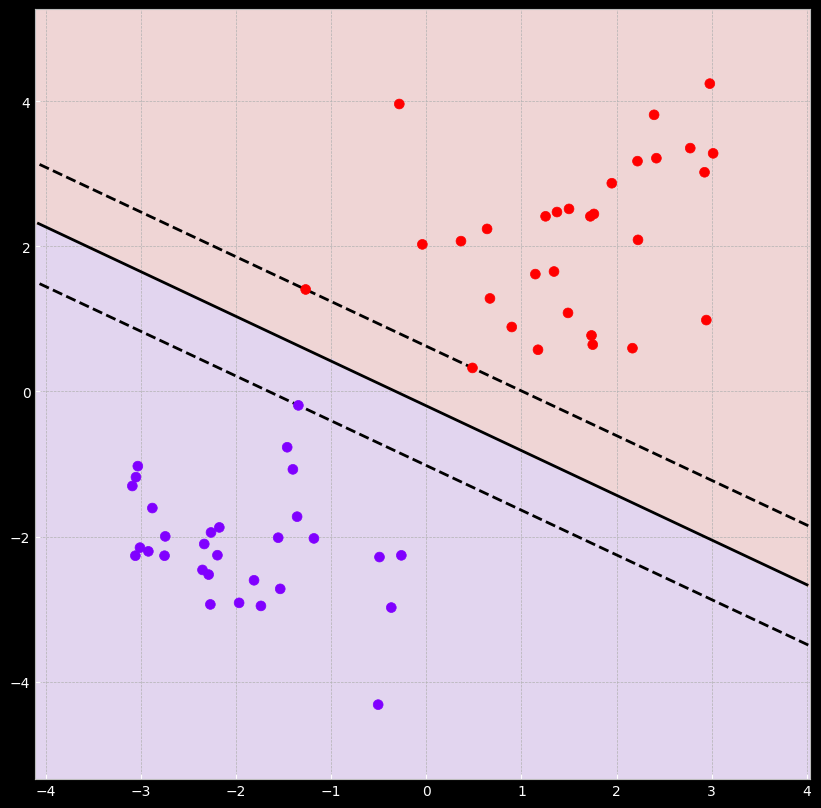

In [2]:
# Random 2d X
X0 = np.random.normal(-2, size=(30,2))
X1 = np.random.normal(2, size=(30,2))
X = np.concatenate([X0,X1], axis=0)

y = X @ [1,1] > 0

clf=svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
Z = clf.decision_function(grid.reshape(2, -1).T)
Z  = Z.reshape(grid.shape[1:])

# 畫出顏色和邊界
plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.1)
plt.contour(grid[0], grid[1], Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
# 標出 sample 點
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=50);


3D view

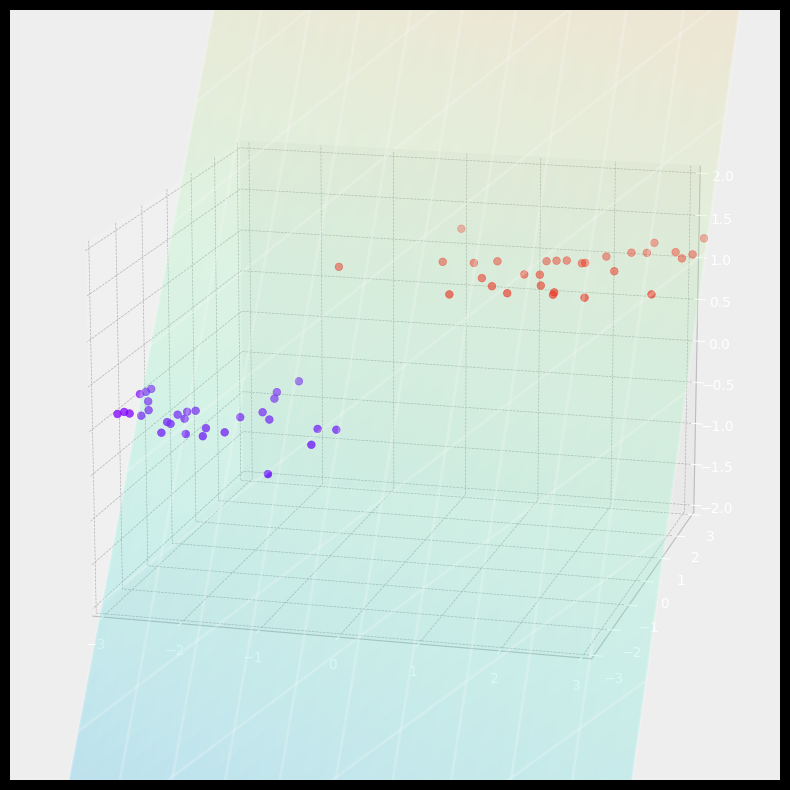

In [3]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.gcf().add_subplot(projection='3d')
ax.plot_surface(grid[0], grid[1], Z, cmap=plt.cm.rainbow, alpha=0.2)
ax.plot_wireframe(grid[0], grid[1], Z, alpha=0.2, rstride=20, cstride=20)
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.rainbow, s=30);
ax.set_zlim3d(-2,2)
ax.set_xlim3d(-3,3)
ax.set_ylim3d(-3,3)
ax.view_init(15, -75)

Linear Nonseparable

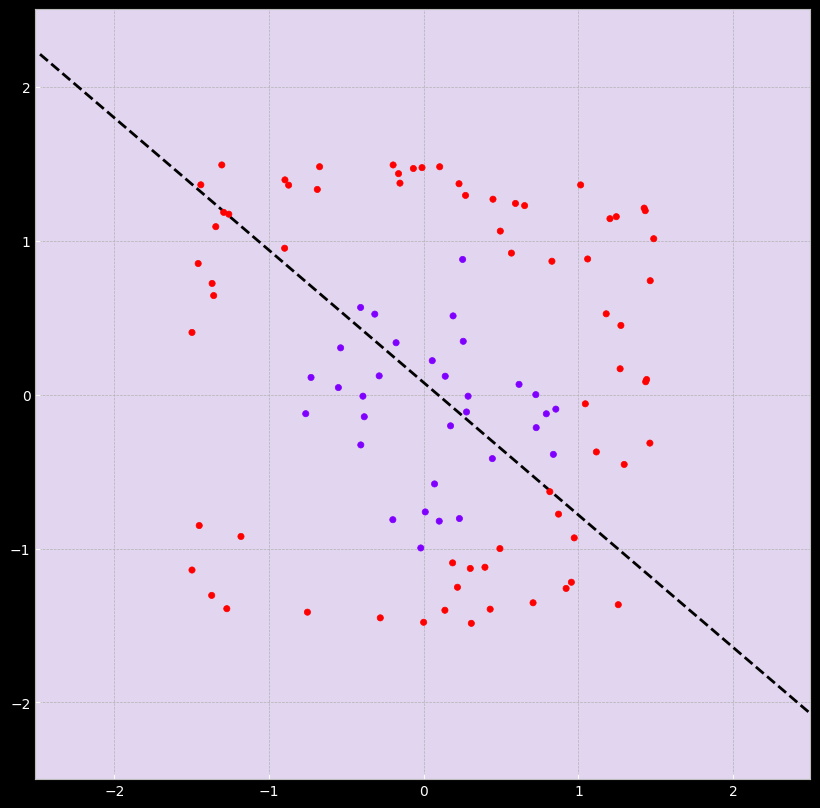

In [4]:
# Random 2d X
X = np.random.uniform(-1.5, 1.5, size=(100,2))

y = (X**2).sum(axis=1) > 1

clf=svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

Z = clf.decision_function(grid.reshape(2, -1).T)
Z  = Z.reshape(grid.shape[1:])

plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.1)
plt.contour(grid[0], grid[1], Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=20);


In [5]:
(np.linspace(-1.5,1.5, 10)[:, None] @ np.linspace(-1.5,1.5, 10)[None, :]).shape


(10, 10)

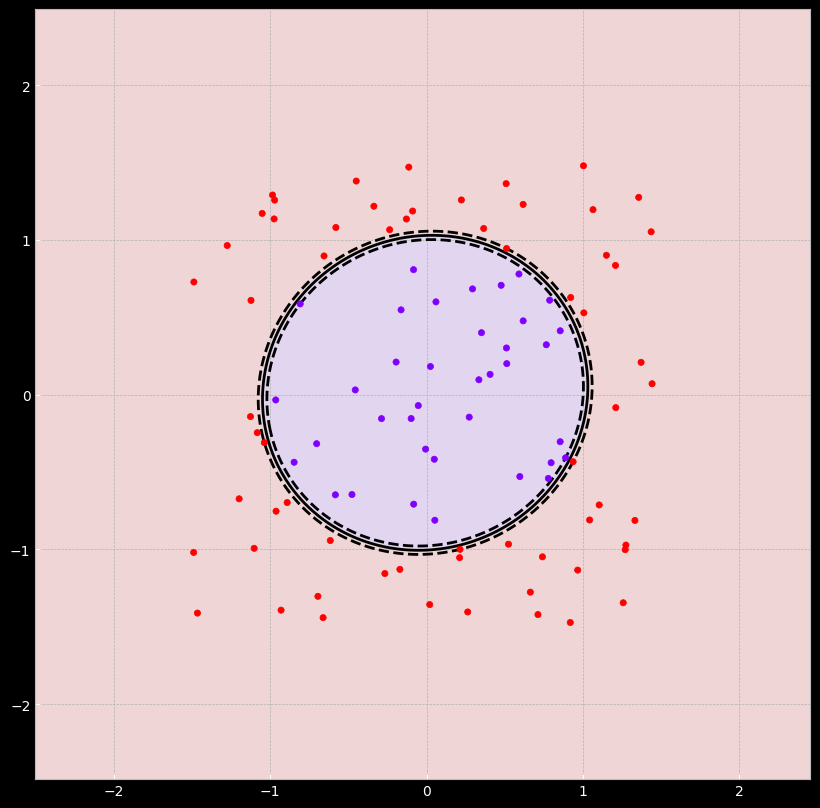

In [5]:
# Random 2d X
X = np.random.uniform(-1.5, 1.5, size=(100,2))
# more feature (x**2, y**2, x*y)
X2 = np.concatenate([X, X**2, (X[:, 0]*X[:, 1])[:, None]], axis=1)
y = (X**2).sum(axis=1) > 1

clf=svm.SVC(kernel='linear', C=1000)
clf.fit(X2, y)

x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)
G = grid.reshape(2, -1).T
G = np.concatenate([G, G**2, (G[:, 0]*G[:, 1])[:, None]], axis=1)

Z = clf.decision_function(G)
Z  = Z.reshape(grid.shape[1:])

plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.1)
plt.contour(grid[0], grid[1], Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=20);


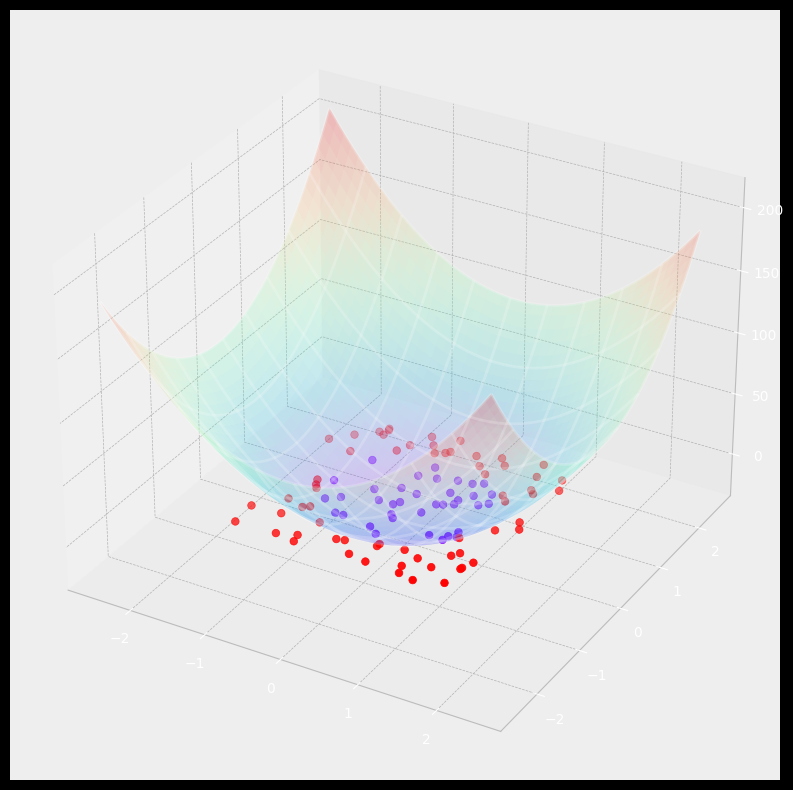

In [7]:
#%matplotlib qt
ax = plt.gcf().add_subplot(projection='3d')
ax.plot_surface(grid[0], grid[1], Z, cmap=plt.cm.rainbow, alpha=0.2)
ax.plot_wireframe(grid[0], grid[1], Z, alpha=0.2, rstride=20, cstride=20)
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.rainbow, s=30);
#plt.show()

With kernel

In [8]:
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,10)

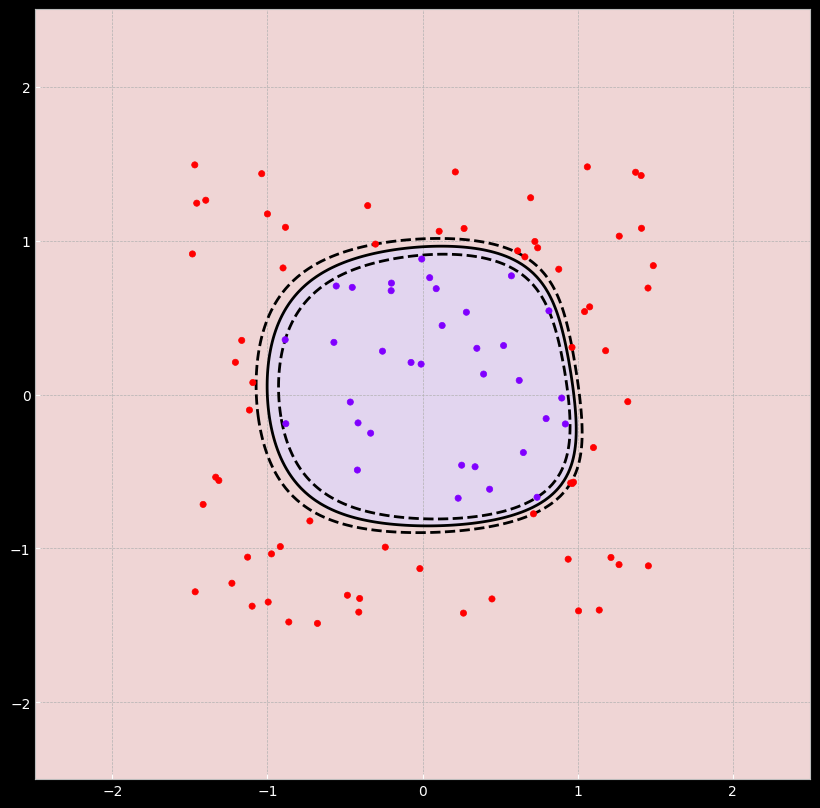

In [9]:
# Random 2d X
X = np.random.uniform(-1.5, 1.5, size=(100,2))
# more feature (x**2, y**2, x*y)
X2 = np.concatenate([X, X**2, (X[:, 0]*X[:, 1])[:, None]], axis=1)
y = (X**2).sum(axis=1) > 1

clf=svm.SVC(kernel='rbf', C=1000)
clf.fit(X2, y)

x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)
G = grid.reshape(2, -1).T
G = np.concatenate([G, G**2, (G[:, 0]*G[:, 1])[:, None]], axis=1)

Z = clf.decision_function(G)
Z  = Z.reshape(grid.shape[1:])

plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.1)
plt.contour(grid[0], grid[1], Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=20);


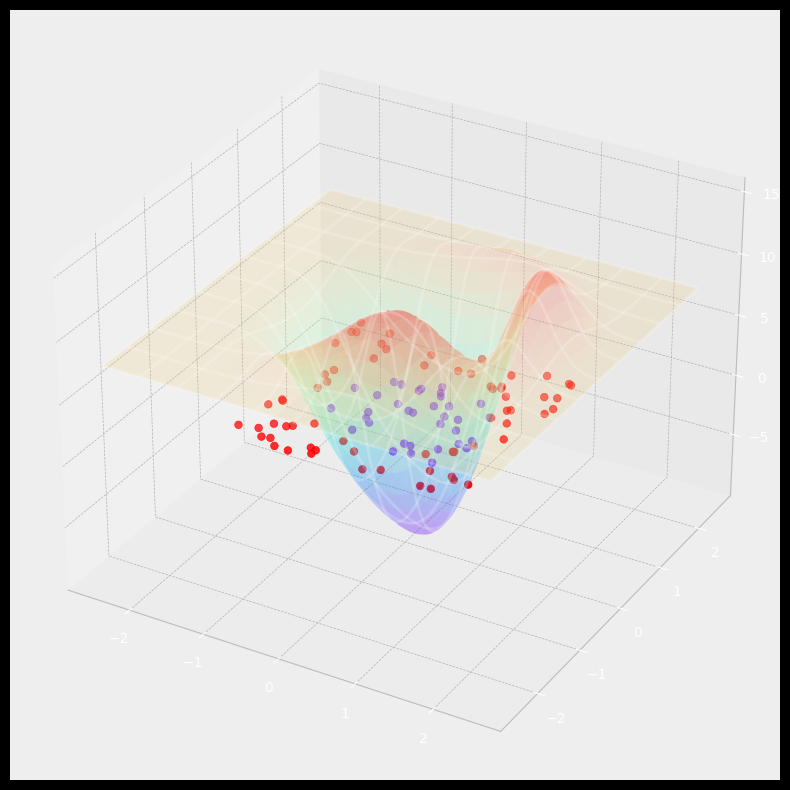

In [11]:
#%matplotlib qt
ax = plt.gcf().add_subplot(projection='3d')
ax.plot_surface(grid[0], grid[1], Z, cmap=plt.cm.rainbow, alpha=0.2)
ax.plot_wireframe(grid[0], grid[1], Z, alpha=0.2, rstride=20, cstride=20)
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.rainbow, s=30);
#plt.show()